# Clean Ct Raw Data and Export to Excel

In [2]:
import pandas as pd
import numpy as np
import time
import datetime as dt

### Import Data

In [3]:
# raw Ct data
df_ct_RAW = pd.read_excel('Ct Values.xlsx')
df_ct_RAW.rename(columns={'Remark1':'CT_value'}, inplace=True)
print(df_ct_RAW.shape)
df_ct_RAW.head()

(137263, 2)


,IDNum,CT_value
0,000012633,"CT(1,35.76,1)(2,34.19,1)(3,N,1)"
1,000015248,"CT(10,27.36,1)"
2,000166298,"CT(10,35,1)"
3,000168294,"CT(1,30.91,1)(3,33.61,1)(2,33.08,1)(10,0,0)"
4,000243345,"CT(10,32.331000,1)(2,31.130000,1)(4,-999.00000..."


In [4]:
### raw Medical Info
df_mi_RAW = pd.read_excel('positives medical info.xlsx')
print(df_mi_RAW.shape)
df_mi_RAW.head()

(841067, 27)


,patient_ID,new_IdentityNumber,age,age_group,health_district_desc,sector,vaccination_status,first_vaccination_date,second_vaccination_date,first_positive_result_test_date,...,worst_medical_situation,date_worst_situation,is_hard_hospitalization,is_hard_hospitalization_ordead,new_deathdate,new_dateofdeath,new_reasonofdeathname,is_hospitalization_dead,is_covid_dead__notat_hospitalization,is_covid_dead
0,23AB48EA-08C3-EA11-915E-005056846F3E,054335765,64,60+,ירושלים,orthodox_agas,1 - First Level Vaccined,2020-12-29,NaT,2021-01-08,...,קל,2020-12-01,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1,3555FB11-FA63-EB11-916F-00505684255C,053838090,65,60+,יזרעאל,arab_agas,1 - First Level Vaccined,2021-01-13,NaT,2021-03-24,...,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2,2C2DA5AE-E4A4-EB11-9175-00505684255C,331677997,13,2021-04-15 00:00:00,ירושלים,arab_agas,0 - Not Vaccinated,NaT,NaT,2021-04-24,...,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
3,847C7A35-DD3D-EB11-917F-005056845C84,310173349,64,60+,חיפה,general_agas,0 - Not Vaccinated,NaT,NaT,2021-01-27,...,קריטי,2021-02-02,היה במצב קשה,היה במצב קשה/נפטר מקורונה,NaT,NaT,NaN,NaN,NaN,NaN
4,3077D718-3348-EB11-916E-00505684255C,080665243,71,60+,ירושלים,arab_agas,0 - Not Vaccinated,NaT,NaT,2021-03-20,...,קריטי,2021-03-28,היה במצב קשה,היה במצב קשה/נפטר מקורונה,NaT,NaT,NaN,NaN,NaN,NaN


In [5]:
# Dictionary by which we can match the genes type to their code in the raw data
gen_dict_df = pd.read_excel('ct data.xlsx', sheet_name='Gen Dict')
gen_dict_df.head()

,Gen_Code,Gen_Name
0,1,E
1,2,N
2,3,RdRp
3,4,S
4,5,(S)


In [6]:
# df_backup = df_merged
df = df_ct_RAW

### Clean Data

In [7]:
df = df_ct_RAW
df['CT_value'] = df['CT_value'].str.replace('\)\(', '@').str.replace('(', '').str.replace(')', '').str.replace('CT', '')
df.head()

,IDNum,CT_value
0,000012633,"1,35.76,1@2,34.19,1@3,N,1"
1,000015248,"10,27.36,1"
2,000166298,"10,35,1"
3,000168294,"1,30.91,1@3,33.61,1@2,33.08,1@10,0,0"
4,000243345,"10,32.331000,1@2,31.130000,1@4,-999.000000,1"


### Turn Text into string of strings

In [8]:
# Split initial string into a list, '@' delimited
df['CT_value_split'] = df['CT_value'].apply(lambda x: str(x).split('@'))


def inner_split(super_lst): # Split strings in super lists into sub-lists, ',' delimited
    return [str(sub_lst).split(',') for sub_lst in super_lst]


# Apply inner split
df['CT_value_split'] = df['CT_value_split'].apply(inner_split)


### Filter out invalid unchecked Ct values

In [9]:
def is_checked(super_lst): # Clean unchecked Cts (where c in (a, b ,c) isn't equal to 1)
    lst = list(filter(lambda x:x[-1] == '1', super_lst))
    return lst


# Apply unchecked cleansing
df['CT_value_split'] = df['CT_value_split'].apply(is_checked)

print(df.shape)
df.head()

(137263, 3)


,IDNum,CT_value,CT_value_split
0,000012633,"1,35.76,1@2,34.19,1@3,N,1","[[1, 35.76, 1], [2, 34.19, 1], [3, N, 1]]"
1,000015248,"10,27.36,1","[[10, 27.36, 1]]"
2,000166298,"10,35,1","[[10, 35, 1]]"
3,000168294,"1,30.91,1@3,33.61,1@2,33.08,1@10,0,0","[[1, 30.91, 1], [3, 33.61, 1], [2, 33.08, 1]]"
4,000243345,"10,32.331000,1@2,31.130000,1@4,-999.000000,1","[[10, 32.331000, 1], [2, 31.130000, 1], [4, -9..."


### Create gene code-name Dictionary

In [10]:
gen_dict = {}
for i, row in gen_dict_df.iterrows():
    gen_dict[str(row['Gen_Code'])] = row['Gen_Name']

gen_dict    


{'1': 'E',
 '2': 'N',
 '3': 'RdRp',
 '4': 'S',
 '5': '(S)',
 '6': 'IC',
 '7': 'ORF',
 '8': 'Orf1',
 '9': 'Orf2',
 '10': 'Orf1ab',
 '11': 'SPC',
 '12': 'PCRC',
 '13': 'IC=RNAseP'}

### Create empty DF to which the Ct values would be inserted

In [11]:
cols = ['IDNum', 'Gen_Name', 'Ct Value']
df_ct = pd.DataFrame(columns = cols)
df_ct

,IDNum,Gen_Name,Ct Value


### Create test DF with optional sampling

In [12]:
df_test = df.sample(frac=1, random_state=1).reset_index()
df_test = df_test.drop(columns=['CT_value'])
print(df_test.shape)
df_test.head()

(137263, 3)


,index,IDNum,CT_value_split
0,66384,320453616,"[[10, 30.317000, 1], [2, 28.437000, 1], [4, -9..."
1,43538,060516341,"[[1, 26.38, 1], [3, 28.97, 1], [2, 28.53, 1]]"
2,40313,043149491,"[[1, 13.49, 1], [3, 16.18, 1], [2, 17.67, 1]]"
3,56932,345316541,"[[10, 19.00, 1]]"
4,17401,015970122,"[[1, 18.72, 1], [3, 20.73, 1], [2, 20.12, 1]]"


# Loop through the DF
### Retrieve each Ct value by its Gene Name

In [13]:
start_time = dt.datetime.now()
print('Start at', start_time.strftime('%H:%M:%S'))

added_df = []

for i, row in df_test.iterrows():

    # Printing and timing the process
    if i % 1000 == 0:
        print('Current time:', dt.datetime.now().strftime('%H:%M:%S'))
        print(f"past {i} rows")
    
    # Main loop
    for gen in row['CT_value_split']:
            if len(gen) > 2:
                if gen[0] in gen_dict.keys():
                    added_df.append([row['IDNum'], gen_dict[gen[0]], gen[1]])

df_ct = pd.concat([df_ct, pd.DataFrame(added_df, columns = cols)])

end_time = dt.datetime.now()
print('End at:', end_time.strftime('%H:%M:%S'))        
time_delta = end_time - start_time
print(f' ***** Total Time: {round(time_delta.total_seconds(), 1)} seconds *****')


Start at 17:50:00
Current time: 17:50:00
past 0 rows
Current time: 17:50:00
past 1000 rows
Current time: 17:50:01
past 2000 rows
Current time: 17:50:01
past 3000 rows
Current time: 17:50:01
past 4000 rows
Current time: 17:50:01
past 5000 rows
Current time: 17:50:01
past 6000 rows
Current time: 17:50:01
past 7000 rows
Current time: 17:50:01
past 8000 rows
Current time: 17:50:01
past 9000 rows
Current time: 17:50:01
past 10000 rows
Current time: 17:50:01
past 11000 rows
Current time: 17:50:02
past 12000 rows
Current time: 17:50:02
past 13000 rows
Current time: 17:50:02
past 14000 rows
Current time: 17:50:02
past 15000 rows
Current time: 17:50:02
past 16000 rows
Current time: 17:50:02
past 17000 rows
Current time: 17:50:02
past 18000 rows
Current time: 17:50:02
past 19000 rows
Current time: 17:50:02
past 20000 rows
Current time: 17:50:03
past 21000 rows
Current time: 17:50:03
past 22000 rows
Current time: 17:50:03
past 23000 rows
Current time: 17:50:03
past 24000 rows
Current time: 17:50:

### Observe our output

In [14]:
print(df_ct.groupby('Gen_Name').count())
print(df_ct.shape)
df_ct.head()

            IDNum  Ct Value
Gen_Name                   
E           96607     96607
IC          12623     12623
IC=RNAseP     141       141
N          102410    102410
Orf1ab      37172     37172
RdRp        94929     94929
S            7247      7247
SPC             1         1
(351130, 3)


,IDNum,Gen_Name,Ct Value
0,320453616,Orf1ab,30.317000
1,320453616,N,28.437000
2,320453616,S,-999.000000
3,060516341,E,26.38
4,060516341,RdRp,28.97


### Clean non-numeric or negative values

In [15]:
df_ct.rename(columns={'Count':'Ct Value'}, inplace=True)
df_filtered = df_ct[pd.to_numeric(df_ct['Ct Value'], errors='coerce').notnull()]
df_filtered['Ct Value'] = df_filtered['Ct Value'].apply(lambda x: float(x))
df_filtered = df_filtered[df_filtered['Ct Value'] > 0]
df_filtered.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(336897, 3)

In [16]:
# Observe Output
df_filtered.sort_values('Ct Value').tail()

,IDNum,Gen_Name,Ct Value
99560,801755323,E,43.72252
48073,032739468,N,43.90000
305680,4628/131466,N,44.44000
151745,212441703,N,44.70000
145900,054929955,N,44.92000


### Merge with Medical Info

In [17]:
df_merged = df_filtered.merge(df_mi_RAW, left_on='IDNum', right_on='new_IdentityNumber', how='left')
print(df_merged.shape)
# df_merged.to_excel('merged raw data.xlsx', index=False)
df_merged.head()

(338086, 30)


,IDNum,Gen_Name,Ct Value,patient_ID,new_IdentityNumber,age,age_group,health_district_desc,sector,vaccination_status,...,worst_medical_situation,date_worst_situation,is_hard_hospitalization,is_hard_hospitalization_ordead,new_deathdate,new_dateofdeath,new_reasonofdeathname,is_hospitalization_dead,is_covid_dead__notat_hospitalization,is_covid_dead
0,320453616,Orf1ab,30.317,69225A18-E087-EB11-9174-00505684255C,320453616,53.0,40-59,מחוז דרום,general_agas,0 - Not Vaccinated,...,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1,320453616,N,28.437,69225A18-E087-EB11-9174-00505684255C,320453616,53.0,40-59,מחוז דרום,general_agas,0 - Not Vaccinated,...,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
2,060516341,E,26.380,64E85C85-8E85-EA11-9155-005056846626,060516341,38.0,20-39,תל-אביב,orthodox_agas,0 - Not Vaccinated,...,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
3,060516341,RdRp,28.970,64E85C85-8E85-EA11-9155-005056846626,060516341,38.0,20-39,תל-אביב,orthodox_agas,0 - Not Vaccinated,...,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
4,060516341,N,28.530,64E85C85-8E85-EA11-9155-005056846626,060516341,38.0,20-39,תל-אביב,orthodox_agas,0 - Not Vaccinated,...,NaN,NaT,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [18]:
g_cols = ['vaccination_status', 'Gen_Name']
df_grouped = df_merged.groupby(g_cols).patient_ID.nunique()
print(df_grouped.shape)
df_grouped.head()

(35,)


vaccination_status  Gen_Name 
0 - Not Vaccinated  E            77413
                    IC            7824
                    IC=RNAseP       73
                    N            82383
                    Orf1ab       27111
Name: patient_ID, dtype: int64

### Export to Excel

In [ ]:
df_merged.to_excel('merged raw data.xlsx')

# The End

In [23]:
import matplotlib.pyplot as plt

In [28]:
df = pd.DataFrame(df_grouped).reset_index()
df


,vaccination_status,Gen_Name,patient_ID
0,0 - Not Vaccinated,E,77413
1,0 - Not Vaccinated,IC,7824
2,0 - Not Vaccinated,IC=RNAseP,73
3,0 - Not Vaccinated,N,82383
4,0 - Not Vaccinated,Orf1ab,27111
5,0 - Not Vaccinated,RdRp,75609
6,0 - Not Vaccinated,S,1815
7,1 - First Level Vaccined,E,11884
8,1 - First Level Vaccined,IC,1632
9,1 - First Level Vaccined,IC=RNAseP,6


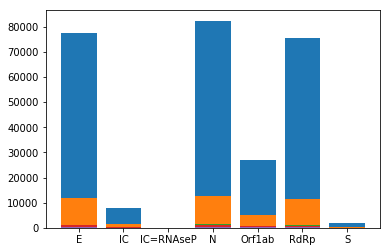

In [37]:
for cat in df.sort_values('patient_ID', ascending=False).vaccination_status.unique():
    new_df = df[df['vaccination_status'] == cat]
    plt.bar(new_df['Gen_Name'], new_df['patient_ID'])

plt.show()